####(10)(11)

/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/cal/softs/anaconda/anaconda-2.0.1/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


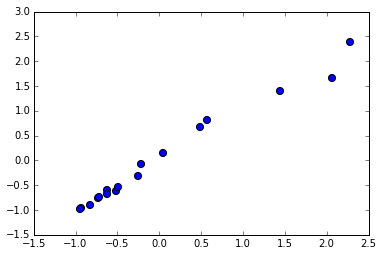

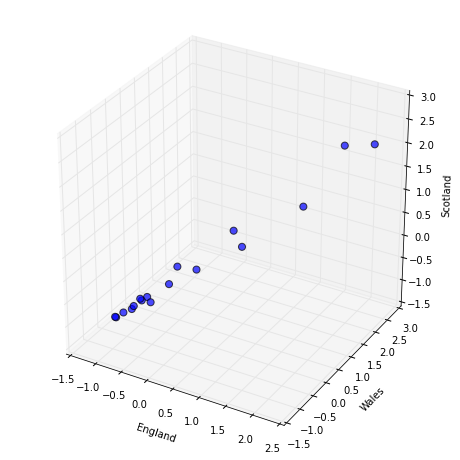

In [35]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from IPython.display import display
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
%matplotlib inline

# (10)
df = pd.read_csv('defraconsumption.csv',sep = ";")

# (11)
X_row = df.as_matrix(columns = df.columns[1:])
#print X
'''
X_scaled = preprocessing.scale(X)
print X_scaled
'''
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X_row)
X = scaler.transform(X_row)
display(df)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=1)  #s: size of points
plt.show()

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 50, alpha = 0.7)
ax.set_xlabel('England')
ax.set_ylabel('Wales')
ax.set_zlabel('Scotland')
plt.show()

[[-0.83028135 -0.89096138 -0.78414166 -0.78171514]
 [-0.51150903 -0.6154117  -0.47903269 -0.34998399]
 [ 0.49034683  0.66456098  0.63604179  0.33520127]
 [-0.73464965 -0.76429741 -0.74243611 -0.7237214 ]
 [-0.62991018 -0.5976343  -0.60634435 -0.47456313]
 [-0.71415715 -0.73096479 -0.6875604  -0.62491726]
 [ 0.57003991  0.82233539  0.23215655  1.2953198 ]
 [-0.49329347 -0.53096906 -0.63487972 -0.61632559]
 [ 0.04178864  0.14679425 -0.09270767 -0.16096736]
 [-0.61852545 -0.6687439  -0.52732332 -0.52181728]
 [-0.24966034 -0.30875158 -0.27050498 -0.2060736 ]
 [ 1.43983296  1.40676736  1.09041269  0.52421789]
 [ 2.28230266  2.39563515  2.19890209  2.28550915]
 [-0.93957472 -0.95762662 -0.89389308 -0.82252554]
 [ 2.05916204  1.67120616  2.44035523  2.31128414]
 [-0.21550616 -0.06431235 -0.00490653 -0.63350892]
 [-0.94640555 -0.97762619 -0.87413783 -0.83541304]]
[[-1.64387422  0.03813   ]
 [-0.9792373   0.15958186]
 [ 1.0645533  -0.21917462]
 [-1.48261467  0.00875623]
 [-1.15527867  0.1074057

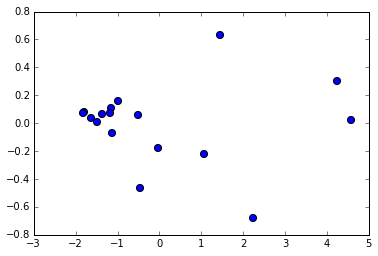

In [38]:
from sklearn.decomposition import PCA
print X
pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X)
print X_pca
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=1)  #s: size of points
plt.show()

# Skills

In [6]:
print X[:, 0]  # The first column of X
df

[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57 1374
  375   54]


,Unnamed: 0,England,Wales,Scotland,N Ireland
0,Cheese,105,103,103,66
1,Carcass meat,245,227,242,267
2,Other meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats and oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh potatoes,720,874,566,1033
7,Fresh Veg,253,265,171,143
8,Other Veg,488,570,418,355
9,Processed potatoes,198,203,220,187


### plot & subplot

##### plot

In [ ]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

plt.figure()
plt.plot(x,v, 'rv--', label='v(x)')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Mon titre')
plt.xlim([-1, 4])
plt.ylim([0, 5])
plt.show()
plt.savefig('toto.png')

##### subplot

In [ ]:
fig = plt.figure(0)
sub1 = fig.add_subplot(121)
sub1.scatter(X[:, 0], X[:, 1], s=98, alpha=1, c=my_orange, zorder=1)
sub1.get_yaxis().set_ticks([])
sub1.get_xaxis().set_ticks([])
sub1.set_ylim([-3., 3.])
sub1.set_xlim([-3., 3.])
sub1.set_aspect('equal')
sub1.set_xlabel(u'Data')
plt.show()

##### para. in scatter
scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, verts, hold, **kwargs)
http://matplotlib.org/api/pyplot_api.html

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=1, c="b", zorder=1)  
#s: size of points
#alpha: transparency
#zorder: the line with higher zorder will cover the lower
plt.show()